In [1]:
import os
import csv
import numpy as np
from matplotlib import rc
import matplotlib.pyplot as plt

In [28]:
size = 1

In [29]:
rc('font', size=12, **{'family': 'serif', 'serif': ['Times New Roman']})

def ordenar_por_numero(nombre_archivo):
    # Obtener el número del nombre del archivo
    numero = int(nombre_archivo.split('=')[1].split('.')[0])
    return numero

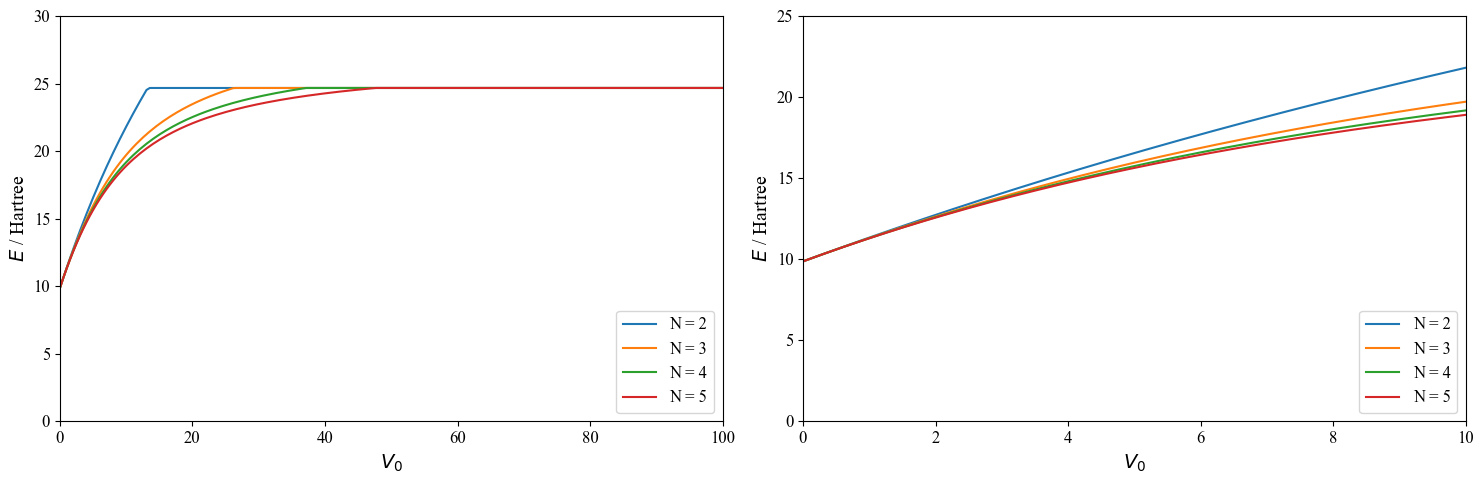

In [30]:
# colors = ['red', '#0027FF', 'green']
# lines = ['--', ':', '-.']
folders = [folder for folder in os.listdir() if '.' not in folder]
folders.reverse()

rows = 1
columns = 2

fig, axs = plt.subplots(rows, columns, figsize=(15, 5))


for n, folder in enumerate(folders):
    files = [file for file in os.listdir(folder) if file.endswith('.csv')]
    files = sorted(files, key=ordenar_por_numero)

    for i, file in enumerate(files):
        N = int(file.split('=')[1].split('.')[0])

        V_0  = []
        energy = []

        with open(f'{folder}/{file}', newline='') as csvfile:
            reader = csv.reader(csvfile)
            next(reader)

            for row in reader:
                V_0.append(float(row[0]))
                energy.append(float(row[1]))


        row = 1
        column = n
        
        axs[column].plot(V_0, energy, label=f'N = {N}')
        # axs[column].set_title(f'$N = {N}$', fontsize=16)
        axs[column].set_xlabel('$V_0$', fontsize=14)
        axs[column].set_ylabel('$E$ / Hartree', fontsize=14)
        axs[column].grid(False)
        axs[column].legend(loc='lower right')
        if folder == 'results_1':
            axs[column].set_xlim(0, 10)
            axs[column].set_ylim(0, 25)
        else:
            axs[column].set_xlim(0, 100)
            axs[column].set_ylim(0, 30)


plt.tight_layout()
plt.savefig(f'{folder}/potential_well_classic_{size}_plot.png')
plt.savefig(f'../../../TFG/Figuras/potential_well_classic_{size}_plot.png')
plt.show()